In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Вычисления
1) Сформируем данные и отсортируем их в порядке возрастания
2) Вычислим 1-й, 2-й(медиана), 3й квартили и межквартильный размах
3) Определим минимальные и максимальные значения boxplot'а, остальное — выбросы

In [3]:
data = np.array([34, 45, 73, 36, 50, 52, 16, 27, 30, 60, 24, 27, 28, 29, 46, 71, 72])
outliers = np.array([])
median, Q1, Q3, IQR = [float()] * 4
data.sort()
median = np.quantile(data, .5) # медиана по сути — 2-й квантиль (50%)
Q1 = np.quantile(data, .25)
Q3 = np.quantile(data, .75)
IQR = Q3 - Q1
min_max = [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
for value in data:
    if min_max[0] > value > min_max[1]:
        np.append(outliers, value)

Вывод основной информации и самого стилизованного boxplot'а

(!) Можно заметить, что выбросы не наблюдаются и наши данные находятся в пределах межквартильного размаха

sorted data=[16 24 27 27 28 29 30 34 36 45 46 50 52 60 71 72 73]
median=36.0
Q1=28.0
Q3=52.0
IQR=24.0
min=-8.0
max=88.0
outliers=[]


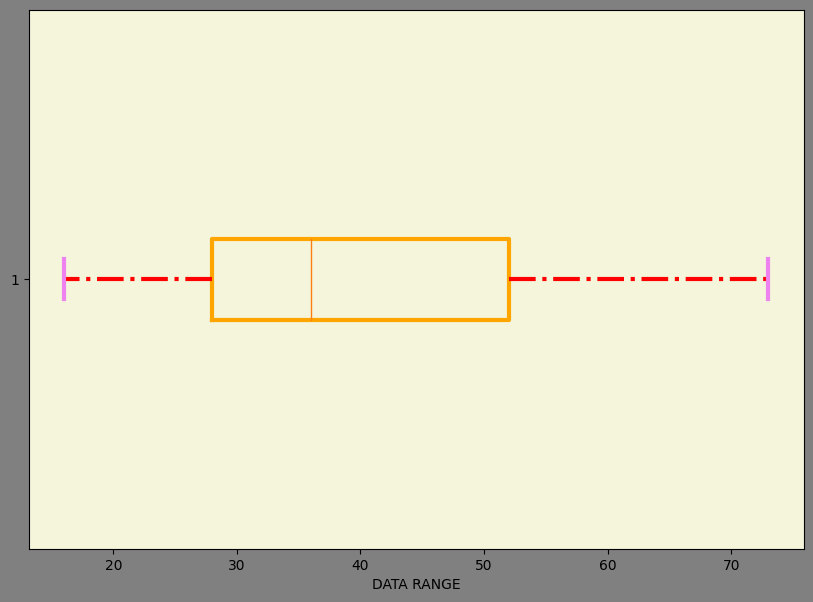

In [4]:
print(f'''sorted data={data}
median={median}
Q1={Q1}
Q3={Q3}
IQR={IQR}
min={min_max[0]}
max={min_max[1]}
outliers={outliers}''')

width = 3 # толщина линий
fig = plt.figure(figsize=(10, 7), facecolor='gray')
ax = fig.add_subplot(facecolor='beige', xlabel='DATA RANGE')
bp = ax.boxplot(data, vert=False)

bp['boxes'][0].set(color='orange',
                  linewidth=width)
for whisker in bp['whiskers']:
    whisker.set(color='#ff0000',
                linewidth=width,
                linestyle='-.')
    
for cap in bp['caps']:
    cap.set(color='violet',
            linewidth=width)